#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import pandas as pd
import numpy as numpy
import urllib.request
from PIL import Image
pd.set_option('display.max.column',None)

## Data

In [2]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")

In [3]:
train.shape

(912, 13)

In [4]:
test = pd.read_csv("data/test.csv")

In [5]:
test.shape

(391, 12)

In [6]:
train['dataset'] = 'train'
test['dataset'] = 'test'

In [7]:
df = pd.concat([train, test], ignore_index=True)

In [8]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,dataset
1298,693,Dell,Alienware 15,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.49kg,NaN,test
1299,1132,Razer,Blade Stealth,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.25kg,NaN,test
1300,49,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.3kg,NaN,test
1301,1243,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,1TB HDD,Intel HD Graphics 405,Windows 10,2.65kg,NaN,test
1302,924,HP,Elitebook Folio,Ultrabook,12.5,4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,240GB SSD,Intel HD Graphics 515,Windows 10,1.09kg,NaN,test


## Data processing

In [9]:
#Nombres columna minúscula
df.columns = df.columns.str.lower()

In [10]:
#Columna ram
df['ram'] = df['ram'].str.rstrip('GB').astype('int')

In [11]:
#Columna weight
df['weight'] = df['weight'].str.rstrip('kg').astype('float')

In [12]:
#Columna company, typename, opsys
cols_to_encode = ['company', 'typename', 'opsys']
df=pd.get_dummies(df, columns=cols_to_encode)
col_bool = df.select_dtypes(include='bool').columns
df[col_bool] = df[col_bool].astype(int)

In [13]:
#Columna product
df['product']= df['product'].str.split(' ', n=1, expand=True)[0]

In [14]:
#Columna screenresolution
df['pixeles'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df[['pix_ancho', 'pix_largo']] = df['pixeles'].str.split('x', expand=True)
df[['pix_ancho', 'pix_largo']] = df[['pix_ancho', 'pix_largo']].astype(int)

In [15]:
df['touchscreen'] = df['screenresolution'].str.contains('Touchscreen', case=False, na=False)
df['touchscreen']=df['touchscreen'].astype(int)

In [16]:
del df['screenresolution']
del df['pixeles']

In [17]:
#Columna Memory
#capacidad disco duro
df['capacidad_dd'] = df['memory'].str.extract('(\d+(\.\d+)?)\s*(TB|GB)')[0].astype(float)
df.loc[df['memory'].str.contains('TB'), 'capacidad_dd'] *= 1024

#tipo de disco duro
df['tipo_dd'] = df['memory'].str.extract('(SSD|HDD|Hybrid|Flash Storage)')
df_dummies = pd.get_dummies(df['tipo_dd'], prefix='tipo_dd')
df_dummies = df_dummies.astype(int)
df = pd.concat([df, df_dummies], axis=1)
del df['tipo_dd']
del df['memory']

In [18]:
#Columna cpu
df['tipo_cpu'] = df['cpu'].str.split().str[0]
df['tipo_cpu'] = df['tipo_cpu'].apply(lambda x: 1 if 'Intel' in str(x) else 0)
del df['cpu']

In [19]:
#Columna gpu
df['tipo_gpu'] = df['gpu'].str.split().str[0]
df['tipo_gpu'] = df['tipo_gpu'].apply(lambda x: 1 if 'Intel' in str(x) else 0)
del df['gpu']
 

In [20]:
#Separacion train-test
train = df[df['dataset'] == 'train']
test = df[df['dataset'] == 'test']

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 0 to 911
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   laptop_id                    912 non-null    int64  
 1   product                      912 non-null    object 
 2   inches                       912 non-null    float64
 3   ram                          912 non-null    int64  
 4   weight                       912 non-null    float64
 5   price_euros                  912 non-null    float64
 6   dataset                      912 non-null    object 
 7   company_Acer                 912 non-null    int64  
 8   company_Apple                912 non-null    int64  
 9   company_Asus                 912 non-null    int64  
 10  company_Chuwi                912 non-null    int64  
 11  company_Dell                 912 non-null    int64  
 12  company_Fujitsu              912 non-null    int64  
 13  company_Google           

In [22]:
#Borramos columna price de test y dataset de ambas
del test['price_euros']
del test['dataset']
del train['dataset']
del test ['product']
del train ['product']

In [23]:
#Guardamos los dataframe nuevos
train.to_csv('data/train_definitivo.csv', index=False)
test.to_csv('data/test_definitivo.csv', index=False)

In [24]:
train = pd.read_csv("data/train_definitivo.csv")
test = pd.read_csv("data/test_definitivo.csv")

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

# Suponiendo que ya tienes un DataFrame llamado df con tus datos y columnas, incluyendo 'precio' como la variable a predecir
# Ajusta las columnas según tus datos

# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de regresión Lasso
modelo_lasso = Lasso(alpha=0.1)  # Ajusta el parámetro de regularización alpha según sea necesario

# Ajustar el modelo en el conjunto de entrenamiento
modelo_lasso.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
predicciones_test_lasso = modelo_lasso.predict(X_test_scaled)

# Calcular el MAE en el conjunto de prueba
mae_test_lasso = mean_absolute_error(y_test, predicciones_test_lasso)

# Mostrar el MAE en el conjunto de prueba
print("MAE en el Conjunto de Prueba con Regresión Lasso:", mae_test_lasso)

# Mostrar los coeficientes obtenidos por la regresión Lasso
coeficientes_lasso = pd.Series(modelo_lasso.coef_, index=X.columns)
print("Coeficientes Lasso:")
print(coeficientes_lasso)

MAE en el Conjunto de Prueba con Regresión Lasso: 250.34884010168082
Coeficientes Lasso:
laptop_id                       41.597850
inches                         -25.054671
ram                            286.095364
weight                          73.155824
company_Acer                   -48.812694
company_Apple                    7.855536
company_Asus                   -32.589283
company_Chuwi                    0.000000
company_Dell                   -42.359492
company_Fujitsu                 -8.167616
company_Google                   6.183077
company_HP                      15.271479
company_Huawei                   0.000000
company_LG                      23.767531
company_Lenovo                  -0.000000
company_MSI                     44.085937
company_Mediacom               -37.651960
company_Microsoft               16.433633
company_Razer                   57.970555
company_Samsung                  5.477861
company_Toshiba                 19.760197
company_Vero                 

In [26]:
X_pred = pd.read_csv("data/test_definitivo.csv")
X_test_scaled = scaler.transform(X_pred)

In [27]:
predictions_submit = modelo_lasso.predict(X_test_scaled)
predictions_submit

array([1112.71779588,  166.69588458,  -37.99066384, 1010.14147709,
        322.00696097,  673.29972917,  454.77759373, 1769.32868348,
       1656.86249031, 1345.04400571,  805.31187232, 1033.89346853,
       1168.96698287,  929.68801305,  841.90221449, 1149.25411527,
       1236.27883864, 2643.77663076,  470.40774941,  677.64760759,
       1403.49480433,  705.18505104,  547.87680034, 1045.36427826,
        498.4456121 , 1572.08247078,  734.77220489,  640.87308209,
        465.68188431, 1319.61420274,  971.21382711, 1022.99857465,
       1018.97635749,  992.13443101, 1942.70514613, 1144.39273079,
        981.12103525, 1378.6779769 ,  834.17425329, 1931.99528514,
       1879.24951563, 1237.73462161,  343.34569793, 1682.54219129,
       1038.4281777 , 2074.86225141,  713.59986723, 1703.98397501,
       1177.82958338, 1700.08585344, 1069.88996218,  450.68882137,
        771.64695217, 1439.86000209,  410.10037527,  947.85264192,
       1001.73439362,  380.71446222, 1161.77767065, 1218.72081

In [25]:
#1
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import train_test_split

# Suponiendo que ya tienes un DataFrame llamado df con tus datos y columnas, incluyendo 'precio' como la variable a predecir
# Ajusta las columnas según tus datos

# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la función de puntuación personalizada para el MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Validación Cruzada con Lasso
modelo_lasso = Lasso(alpha=0.1)  # Ajusta el parámetro de regularización alpha según sea necesario
scores_lasso = cross_val_score(modelo_lasso, X_train_scaled, y_train, scoring=mae_scorer, cv=5)

# Validación Cruzada con SVM
modelo_svm = SVR(kernel='linear', C=1)  # Ajusta el parámetro de regularización C según sea necesario
scores_svm = cross_val_score(modelo_svm, X_train_scaled, y_train, scoring=mae_scorer, cv=5)

# Mostrar los resultados de la validación cruzada
print("MAE en Validación Cruzada con Lasso:", -scores_lasso.mean())
print("MAE en Validación Cruzada con SVM:", -scores_svm.mean())

/Users/itziarc/Desktop/DS_PT_09_2023-2/mi_entorno/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.220e+06, tolerance: 2.471e+04
  model = cd_fast.enet_coordinate_descent(
/Users/itziarc/Desktop/DS_PT_09_2023-2/mi_entorno/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.330e+05, tolerance: 2.669e+04
  model = cd_fast.enet_coordinate_descent(


MAE en Validación Cruzada con Lasso: 254.5752510131615
MAE en Validación Cruzada con SVM: 263.95722368930353


In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error

# Suponiendo que ya tienes un DataFrame llamado df con tus datos y columnas, incluyendo 'precio' como la variable a predecir
# Ajusta las columnas según tus datos

# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de SVM lineal
modelo_svm = SVR(kernel='linear')

# Definir la cuadrícula de parámetros a explorar
parametros_svm = {'C': [0.1, 1, 10, 100]}

# Crear una función de puntuación personalizada para el MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(modelo_svm, parametros_svm, scoring=mae_scorer, cv=5)

# Ajustar el modelo utilizando Grid Search
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_

# Mostrar los mejores hiperparámetros
print("Mejores Hiperparámetros:", mejores_hiperparametros)

# Hacer predicciones en el conjunto de prueba utilizando el modelo con mejores hiperparámetros
predicciones_test = grid_search.predict(X_test_scaled)

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_test, predicciones_test)

# Mostrar el MAE en el conjunto de prueba
print("MAE en el Conjunto de Prueba con SVM Optimizado:", mae_test)

Mejores Hiperparámetros: {'C': 10}
MAE en el Conjunto de Prueba con SVM Optimizado: 245.5700260989176


In [299]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Suponiendo que ya tienes un DataFrame llamado df con tus datos y columnas, incluyendo 'precio' como la variable a predecir
# Ajusta las columnas según tus datos

# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear un modelo de SVM con kernel polinómico
modelo_svm_poly = SVR(kernel='poly', degree=2)  # Puedes ajustar el grado del polinomio según sea necesario

# Entrenar el modelo en el conjunto de entrenamiento escalado
modelo_svm_poly.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
predicciones_test_svm_poly = modelo_svm_poly.predict(X_test_scaled)

# Calcular el MAE en el conjunto de prueba
mae_test_svm_poly = mean_absolute_error(y_test, predicciones_test_svm_poly)

# Mostrar el MAE en el conjunto de prueba
print("MAE en el Conjunto de Prueba con SVM Polinómica:", mae_test_svm_poly)

MAE en el Conjunto de Prueba con SVM Polinómica: 487.51745722318515


In [324]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Suponiendo que ya tienes un DataFrame llamado df con tus datos y columnas, incluyendo 'precio' como la variable a predecir
# Ajusta las columnas según tus datos

# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto StandardScaler para escalar las características
scaler = StandardScaler()

# Escalar las características del conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Crear un modelo de Support Vector Machine (SVR)
modelo_svm = SVR()

# Entrenar el modelo en el conjunto de entrenamiento escalado
modelo_svm.fit(X_train_scaled, y_train)

# Escalar las características del conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Predecir en el conjunto de prueba
predicciones_test = modelo_svm.predict(X_test_scaled)

# Calcular el MAE en el conjunto de prueba
mae_test = mean_absolute_error(y_test, predicciones_test)

# Mostrar el MAE en el conjunto de prueba
print("MAE en el Conjunto de Prueba con SVM:", mae_test)

MAE en el Conjunto de Prueba con SVM: 480.2023048390775


### 1. Definir X e y

In [224]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline


# Seleccionar las columnas de características y el objetivo
X = train.drop(['price_euros'], axis=1)  # Todas las columnas excepto la columna 'precio'
y = train['price_euros'] 

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear objetos de modelos
modelo_lineal = LinearRegression()
modelo_svm = SVR()

# Crear objetos de StandardScaler
scaler_lineal = StandardScaler()
scaler_svm = StandardScaler()

# Crear pipelines para regresión lineal y SVM
pipeline_lineal = Pipeline([('scaler', scaler_lineal), ('modelo', modelo_lineal)])
pipeline_svm = Pipeline([('scaler', scaler_svm), ('modelo', modelo_svm)])

# Crear función de puntuación personalizada para el MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Aplicar la validación cruzada con regresión lineal
puntuaciones_mae_lineal = -cross_val_score(pipeline_lineal, X_train, y_train, cv=5, scoring=mae_scorer)
media_mae_lineal = puntuaciones_mae_lineal.mean()

# Aplicar la validación cruzada con SVM
puntuaciones_mae_svm = -cross_val_score(pipeline_svm, X_train, y_train, cv=5, scoring=mae_scorer)
media_mae_svm = puntuaciones_mae_svm.mean()

# Imprimir resultados
print("MAE Medio con Regresión Lineal:", media_mae_lineal)
print("MAE Medio con Support Vector Machine:", media_mae_svm)

MAE Medio con Regresión Lineal: 17699736542577.598
MAE Medio con Support Vector Machine: 504.3083363327256


### 2. Dividir X_train, X_test, y_train, y_test

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [187]:
X_test

,laptop_id,inches,ram,weight,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,company_HP,company_Huawei,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS,pix_ancho,pix_largo,touchscreen,capacidad_dd,tipo_dd_Flash Storage,tipo_dd_HDD,tipo_dd_Hybrid,tipo_dd_SSD,tipo_cpu,tipo_gpu
649,636,15.6,8,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,256.0,0,0,0,1,1,0
761,23,15.6,4,1.86,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1366,768,0,500.0,0,1,0,0,0,0
545,28,15.6,8,2.20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,256.0,0,0,0,1,1,0
367,672,17.3,8,2.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,131072.0,0,0,0,1,1,0
361,1251,17.3,16,2.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,262144.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,421,13.3,8,1.27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1920,1080,1,256.0,0,0,0,1,1,1
581,282,15.6,8,2.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,1024.0,0,1,0,0,1,0
872,589,13.3,4,1.49,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,128.0,0,0,0,1,1,1
449,841,15.6,4,2.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1920,1080,0,1024.0,0,1,0,0,1,0


### 3. Asignar el modelo (vacío) a una variable


In [188]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [189]:
model.fit(X_train,y_train)

LinearRegression()

In [190]:
pred = model.predict(X_test)
pred

array([ 956.70557379,  -67.23379649,  912.58611418, 1534.52067118,
       2086.15820352,  685.81621478, 1042.82093114, 1651.16260146,
        917.651385  , 1321.49023635, 1078.92983698,  632.05559712,
        392.42192043, 1425.91385802, 1465.38631574, 1688.10089143,
       1738.68535003, 1294.80605932, 1051.50412959,  489.39194597,
        759.17142502,  508.28033165, 1014.2821522 ,  915.52408092,
        954.18954065,  497.72024183,  982.78121681, 1820.97107987,
        829.94604551,  800.09119339, 1430.4925601 , 1042.34379736,
        644.42208388, 1493.17606475, 1124.01036698,  319.14175017,
        543.20583085,  988.1501962 , 1420.39379306, 1113.76061561,
       1246.6464959 , 1113.393982  , 1100.2942391 , 2047.76519882,
       1022.90541648,  399.60809943, 1322.86036655,  575.31932826,
       1254.61018434,  793.74427528, 1630.27626331,  746.06036245,
         60.88765331, 2340.70099573, 1203.30814133, 1719.04478979,
       1635.15152763, 1056.7945894 , 2008.92127537, 1722.35783

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

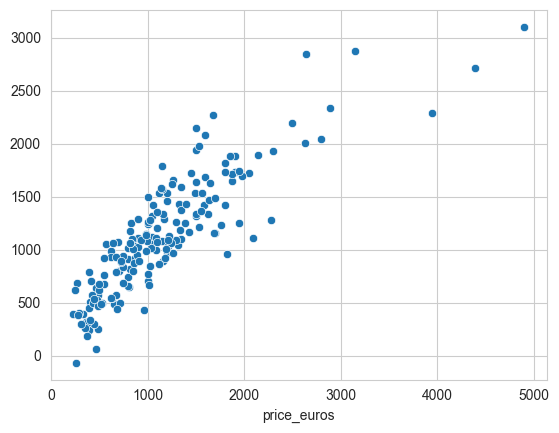

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.scatterplot(x=y_test, y=pred);

In [195]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))


MAE: 251.4570670311558


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

In [196]:
X_pred = pd.read_csv("data/test_definitivo.csv")
X_pred.head()

,laptop_id,inches,ram,weight,company_Acer,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Fujitsu,company_Google,company_HP,company_Huawei,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi,typename_2 in 1 Convertible,typename_Gaming,typename_Netbook,typename_Notebook,typename_Ultrabook,typename_Workstation,opsys_Android,opsys_Chrome OS,opsys_Linux,opsys_Mac OS X,opsys_No OS,opsys_Windows 10,opsys_Windows 10 S,opsys_Windows 7,opsys_macOS,pix_ancho,pix_largo,touchscreen,capacidad_dd,tipo_dd_Flash Storage,tipo_dd_HDD,tipo_dd_Hybrid,tipo_dd_SSD,tipo_cpu,tipo_gpu
0,750,14.0,8,1.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,1,256.0,0,0,0,1,1,1
1,726,14.0,4,1.40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1200,0,32.0,0,1,0,0,1,1
2,633,14.0,2,1.40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,32.0,1,0,0,0,1,1
3,363,15.6,8,2.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1920,1080,0,1024.0,0,1,0,0,1,0
4,319,11.6,2,1.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1366,768,1,32.0,1,0,0,0,1,1


### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [198]:
predictions_submit = model.predict(X_pred)
predictions_submit

array([1110.06107426,   92.06140656,  -39.78795511, 1009.81439187,
        323.8927965 ,  672.96615948,  453.10310858, 1769.51576366,
       1657.5767666 , 1344.93358491,  804.00164297, 1034.77719022,
       1168.07644757,  928.94010581,  841.2844234 , 1148.7942031 ,
       1235.93863299, 2645.56370855,  470.82959779,  678.06926554,
       1404.53585801,  703.71389164,  547.7430074 , 1044.6518171 ,
        497.05391546, 1572.74171261,  735.29198501,  640.19794201,
        465.43322017, 1319.38700165,  970.18915732, 1022.42225246,
       1019.91269396,  992.70355719, 1943.09525426, 1145.16740374,
        980.73999538, 1380.15022436,  835.15203782, 1929.6521472 ,
       1879.7722672 , 1237.13140814,  342.04196457, 1673.93750529,
       1038.35817496, 2076.52869179,  712.80248047, 1702.30567264,
       1177.39718094, 1699.48421646, 1070.71813382,  450.77462978,
        771.77873553, 1439.59769629,  408.85244333,  947.86095521,
       1000.64768187,  380.93191175, 1162.96480382, 1220.32011

In [199]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))

MAE: 251.4570670311558


**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [28]:
#crear csv apartir de aqui
sample = pd.read_csv("data/sample_submission.csv")

In [29]:
sample.head()

,laptop_ID,Price_euros
0,750,500
1,726,500
2,633,500
3,363,650
4,319,650


In [30]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [31]:
submission_subir = pd.DataFrame({"laptop_ID": sample['laptop_ID'], "Price_euros": predictions_submit})

In [32]:
submission_subir.head()

,laptop_ID,Price_euros
0,750,1112.717796
1,726,166.695885
2,633,-37.990664
3,363,1010.141477
4,319,322.006961


In [28]:
submission_subir.shape

(391, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [33]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission_subir.to_csv("submission_subir.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [34]:
chequeator(submission_subir)

You're ready to submit!
